In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno

from sklearn.feature_selection import *
from sklearn.feature_extraction import *
from sklearn.decomposition import *
from sklearn.model_selection import *
from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.pipeline import *
from sklearn.covariance import *
from sklearn.metrics import *
from sklearn.compose import *

from sklearn.dummy import *
from sklearn.linear_model import *
from sklearn.neighbors import *
from sklearn.svm import *
from sklearn.ensemble import *
from sklearn.cluster import *

In [ ]:
# DO NOT REMOVE THIS LINE

cd ..

In [2]:
df = pd.read_csv('application_train.csv')

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = df.sample(frac = 0.05)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
176999,305107,0,Cash loans,F,Y,N,0,117000.0,1350000.0,37255.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
213398,347284,1,Cash loans,F,N,Y,0,67500.0,342000.0,16762.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0
169315,296241,0,Cash loans,F,N,Y,0,180000.0,254799.0,13950.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
228899,365133,0,Cash loans,F,Y,Y,0,517500.0,834048.0,27693.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
140700,263144,0,Cash loans,F,N,Y,0,108000.0,450000.0,17095.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66070,176624,0,Cash loans,F,N,Y,0,157500.0,772686.0,25056.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
76890,189159,0,Cash loans,M,Y,Y,0,225000.0,243000.0,28836.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,3.0
196236,327534,0,Cash loans,F,Y,Y,1,247500.0,269550.0,21739.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,9.0
12168,114188,0,Cash loans,M,Y,Y,0,180000.0,545040.0,26640.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,3.0


In [5]:
# filter for correl
#df = df.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
#                'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED'
#                ])

df = df.filter(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                'ORGANIZATION_TYPE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2',  'EXT_SOURCE_3'
                ])


df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
176999,0,Cash loans,F,Y,N,0,117000.0,1350000.0,37255.5,1350000.0,...,Higher education,Married,House / apartment,-21556,365243,XNA,NaN,NaN,0.297307,0.665855
213398,1,Cash loans,F,N,Y,0,67500.0,342000.0,16762.5,342000.0,...,Secondary / secondary special,Married,House / apartment,-17909,-3128,Medicine,Medicine staff,NaN,0.549544,0.065993
169315,0,Cash loans,F,N,Y,0,180000.0,254799.0,13950.0,193500.0,...,Secondary / secondary special,Married,House / apartment,-21350,365243,XNA,NaN,0.599112,0.592089,0.588488
228899,0,Cash loans,F,Y,Y,0,517500.0,834048.0,27693.0,720000.0,...,Higher education,Married,House / apartment,-19107,-613,Bank,Managers,NaN,0.618755,0.670652
140700,0,Cash loans,F,N,Y,0,108000.0,450000.0,17095.5,450000.0,...,Secondary / secondary special,Single / not married,House / apartment,-16633,-4234,Self-employed,Sales staff,NaN,0.780557,0.740799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66070,0,Cash loans,F,N,Y,0,157500.0,772686.0,25056.0,553500.0,...,Secondary / secondary special,Widow,House / apartment,-17305,365243,XNA,NaN,NaN,0.668224,0.537070
76890,0,Cash loans,M,Y,Y,0,225000.0,243000.0,28836.0,243000.0,...,Secondary / secondary special,Married,House / apartment,-16353,-2743,Business Entity Type 3,Managers,NaN,0.605861,0.320163
196236,0,Cash loans,F,Y,Y,1,247500.0,269550.0,21739.5,225000.0,...,Higher education,Civil marriage,House / apartment,-15340,-1009,Self-employed,Sales staff,NaN,0.793654,0.454321
12168,0,Cash loans,M,Y,Y,0,180000.0,545040.0,26640.0,450000.0,...,Secondary / secondary special,Married,House / apartment,-11683,-3114,Industry: type 5,NaN,0.077362,0.672963,0.130129


In [6]:
df.sort_values('AMT_INCOME_TOTAL', ascending = False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
204564,0,Cash loans,M,N,N,0,4500000.0,450000.0,47749.5,450000.0,...,Higher education,Single / not married,House / apartment,-18461,-8472,Military,Managers,0.474598,0.798003,NaN
101007,0,Revolving loans,M,Y,Y,0,3150000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-13386,-5564,Trade: type 2,NaN,NaN,0.551281,0.574447
107926,0,Cash loans,M,Y,Y,0,2930026.5,900000.0,36657.0,900000.0,...,Secondary / secondary special,Married,House / apartment,-15523,-3285,Business Entity Type 3,Managers,NaN,0.580437,0.569149
206814,0,Cash loans,F,N,Y,0,2250000.0,976077.0,52132.5,922500.0,...,Higher education,Separated,House / apartment,-22734,-3399,Business Entity Type 3,Managers,0.928757,0.626006,0.177704
81185,0,Revolving loans,F,Y,N,0,2250000.0,2250000.0,112500.0,2250000.0,...,Higher education,Single / not married,House / apartment,-13081,365243,XNA,NaN,NaN,0.698872,0.558507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165555,0,Cash loans,F,N,N,1,27000.0,900000.0,26316.0,900000.0,...,Higher education,Married,House / apartment,-11137,-3280,Business Entity Type 1,NaN,0.634276,0.746797,0.563835
4735,0,Cash loans,M,N,Y,0,27000.0,284400.0,9211.5,225000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-13329,365243,XNA,NaN,NaN,0.658689,0.602386
24224,0,Cash loans,F,N,Y,0,27000.0,71955.0,7245.0,67500.0,...,Secondary / secondary special,Married,House / apartment,-19368,-9937,Kindergarten,Cooking staff,NaN,0.644988,0.593718
292142,0,Cash loans,F,N,Y,1,27000.0,480060.0,23476.5,337500.0,...,Secondary / secondary special,Married,House / apartment,-10154,-820,Kindergarten,Core staff,NaN,0.189053,0.511892


In [7]:
df.sort_values('AMT_CREDIT', ascending = False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
119681,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,4050000.0,...,Higher education,Married,House / apartment,-12536,-681,Transport: type 4,Managers,0.594641,0.571261,0.652897
184460,0,Cash loans,M,Y,N,1,391972.5,3375000.0,85320.0,3375000.0,...,Higher education,Married,House / apartment,-10139,-1458,Trade: type 2,Core staff,0.575781,0.453439,0.553165
250837,0,Cash loans,M,Y,N,1,1053333.0,3375000.0,85320.0,3375000.0,...,Higher education,Married,House / apartment,-11235,-1505,Business Entity Type 3,Managers,NaN,0.463738,0.626304
170935,0,Cash loans,M,Y,Y,1,1575000.0,3299688.0,170986.5,3150000.0,...,Higher education,Married,House / apartment,-12472,-1720,Business Entity Type 3,Managers,0.720379,0.783109,0.799297
264232,0,Cash loans,M,Y,Y,2,652500.0,2931660.0,74241.0,2700000.0,...,Higher education,Civil marriage,House / apartment,-17531,-505,Business Entity Type 3,Managers,NaN,0.635271,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246609,0,Cash loans,M,Y,N,0,90000.0,45000.0,4450.5,45000.0,...,Higher education,Married,Office apartment,-20646,-5000,Industry: type 3,Laborers,NaN,0.645479,0.394495
148013,0,Cash loans,M,Y,N,0,157500.0,45000.0,4774.5,45000.0,...,Secondary / secondary special,Single / not married,With parents,-9632,-792,Construction,Laborers,0.124599,0.104498,0.213967
257027,0,Cash loans,F,N,Y,1,81000.0,45000.0,2295.0,45000.0,...,Secondary / secondary special,Single / not married,House / apartment,-18363,-11528,Other,NaN,0.828653,0.447701,0.656158
203253,0,Cash loans,F,N,N,1,90000.0,45000.0,4725.0,45000.0,...,Higher education,Civil marriage,House / apartment,-9703,-791,Bank,Core staff,NaN,0.368974,0.202087


In [8]:
df.sort_values('AMT_ANNUITY', ascending = False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
101007,0,Revolving loans,M,Y,Y,0,3150000.0,2250000.0,225000.0,2250000.0,...,Higher education,Married,House / apartment,-13386,-5564,Trade: type 2,NaN,NaN,0.551281,0.574447
170935,0,Cash loans,M,Y,Y,1,1575000.0,3299688.0,170986.5,3150000.0,...,Higher education,Married,House / apartment,-12472,-1720,Business Entity Type 3,Managers,0.720379,0.783109,0.799297
176644,0,Cash loans,M,Y,N,0,450000.0,1665000.0,160686.0,1665000.0,...,Higher education,Civil marriage,House / apartment,-19901,-4815,Other,NaN,0.674909,0.723156,0.716570
64797,0,Cash loans,M,Y,Y,0,337500.0,2250000.0,145485.0,2250000.0,...,Incomplete higher,Married,House / apartment,-23628,365243,XNA,NaN,0.874446,0.601901,NaN
70625,0,Cash loans,M,N,N,0,427500.0,1350000.0,128182.5,1350000.0,...,Secondary / secondary special,Married,House / apartment,-19820,-7297,Other,NaN,NaN,0.195196,0.420611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246774,0,Cash loans,F,N,Y,0,63000.0,61128.0,3636.0,54000.0,...,Secondary / secondary special,Single / not married,House / apartment,-18957,365243,XNA,NaN,0.603046,0.757565,0.772631
185528,0,Cash loans,F,Y,N,1,135000.0,62820.0,3537.0,45000.0,...,Secondary / secondary special,Married,Municipal apartment,-15872,-7822,Business Entity Type 3,Managers,NaN,0.653860,0.177704
177323,0,Cash loans,M,N,Y,0,99000.0,49500.0,3519.0,49500.0,...,Secondary / secondary special,Married,House / apartment,-16990,-3602,Business Entity Type 3,Security staff,0.591134,0.657651,NaN
113755,0,Cash loans,M,Y,Y,2,112500.0,67500.0,3411.0,67500.0,...,Secondary / secondary special,Married,House / apartment,-12854,-1132,Business Entity Type 3,Drivers,0.535021,0.676284,0.177704


In [9]:
df.sort_values('AMT_GOODS_PRICE', ascending = False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
119681,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,4050000.0,...,Higher education,Married,House / apartment,-12536,-681,Transport: type 4,Managers,0.594641,0.571261,0.652897
184460,0,Cash loans,M,Y,N,1,391972.5,3375000.0,85320.0,3375000.0,...,Higher education,Married,House / apartment,-10139,-1458,Trade: type 2,Core staff,0.575781,0.453439,0.553165
250837,0,Cash loans,M,Y,N,1,1053333.0,3375000.0,85320.0,3375000.0,...,Higher education,Married,House / apartment,-11235,-1505,Business Entity Type 3,Managers,NaN,0.463738,0.626304
170935,0,Cash loans,M,Y,Y,1,1575000.0,3299688.0,170986.5,3150000.0,...,Higher education,Married,House / apartment,-12472,-1720,Business Entity Type 3,Managers,0.720379,0.783109,0.799297
264232,0,Cash loans,M,Y,Y,2,652500.0,2931660.0,74241.0,2700000.0,...,Higher education,Civil marriage,House / apartment,-17531,-505,Business Entity Type 3,Managers,NaN,0.635271,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204519,0,Revolving loans,F,N,N,0,202500.0,360000.0,18000.0,NaN,...,Higher education,Married,House / apartment,-8940,-2248,Self-employed,Sales staff,0.335980,0.050720,0.401407
287092,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,NaN,...,Secondary / secondary special,Married,House / apartment,-21339,-13031,Business Entity Type 3,Laborers,NaN,0.481554,NaN
113036,0,Revolving loans,F,N,N,0,126000.0,202500.0,10125.0,NaN,...,Secondary / secondary special,Married,House / apartment,-12646,-4335,Transport: type 3,High skill tech staff,0.341123,0.532212,0.540654
156456,0,Revolving loans,M,N,Y,4,180000.0,900000.0,45000.0,NaN,...,Higher education,Married,House / apartment,-15496,-2804,Transport: type 4,Managers,NaN,0.788781,0.158555


In [10]:
df.sort_values('DAYS_BIRTH', ascending = False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
168135,0,Cash loans,F,N,Y,0,90000.0,225000.0,17905.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-7673,-440,Other,NaN,NaN,0.302255,NaN
173803,0,Revolving loans,F,N,Y,1,72000.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Married,With parents,-7678,-990,Self-employed,NaN,NaN,0.316462,NaN
183033,0,Revolving loans,F,N,Y,0,90000.0,247500.0,12375.0,247500.0,...,Secondary / secondary special,Single / not married,With parents,-7680,-855,Industry: type 5,Laborers,0.224709,0.422088,NaN
13589,0,Revolving loans,M,N,Y,0,202500.0,180000.0,9000.0,180000.0,...,Incomplete higher,Single / not married,House / apartment,-7689,-990,Business Entity Type 3,Core staff,0.105080,0.241752,NaN
207409,0,Revolving loans,M,N,Y,0,112500.0,180000.0,9000.0,180000.0,...,Secondary / secondary special,Single / not married,House / apartment,-7696,-873,Military,Core staff,0.220090,0.535395,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148341,0,Cash loans,F,N,Y,0,85500.0,254700.0,24808.5,225000.0,...,Secondary / secondary special,Widow,House / apartment,-25147,365243,XNA,NaN,NaN,0.638492,0.795803
3078,0,Cash loans,F,N,Y,0,180000.0,254700.0,24808.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-25160,365243,XNA,NaN,NaN,0.720319,0.828729
251330,0,Cash loans,F,N,Y,0,135000.0,225000.0,22383.0,225000.0,...,Secondary / secondary special,Married,House / apartment,-25161,365243,XNA,NaN,NaN,0.760385,0.759712
143266,0,Cash loans,F,N,Y,0,202500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-25200,-16651,Medicine,Medicine staff,NaN,0.713440,0.802745


In [11]:
df.sort_values('DAYS_EMPLOYED', ascending = False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
176999,0,Cash loans,F,Y,N,0,117000.0,1350000.0,37255.5,1350000.0,...,Higher education,Married,House / apartment,-21556,365243,XNA,NaN,NaN,0.297307,0.665855
46337,0,Cash loans,F,N,Y,0,50400.0,254700.0,14350.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-24159,365243,XNA,NaN,NaN,0.691607,0.315472
39927,0,Cash loans,F,N,Y,0,90000.0,540000.0,15916.5,540000.0,...,Secondary / secondary special,Widow,House / apartment,-23551,365243,XNA,NaN,NaN,0.162145,NaN
133223,0,Cash loans,M,Y,Y,0,90000.0,288873.0,10503.0,238500.0,...,Secondary / secondary special,Married,Municipal apartment,-23507,365243,XNA,NaN,0.803288,0.653780,0.825636
82192,0,Cash loans,F,N,Y,0,112500.0,945000.0,40167.0,945000.0,...,Higher education,Married,House / apartment,-22403,365243,XNA,NaN,NaN,0.596150,0.581484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289176,1,Cash loans,F,N,Y,0,225000.0,1305909.0,43285.5,1170000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-22928,-16069,Industry: type 11,Laborers,NaN,0.739787,0.576209
77348,0,Cash loans,F,N,Y,0,202500.0,733315.5,69754.5,679500.0,...,Secondary / secondary special,Married,House / apartment,-23042,-16169,Industry: type 11,NaN,NaN,0.576699,0.659406
117675,0,Cash loans,F,N,Y,0,144000.0,1206954.0,35419.5,945000.0,...,Secondary / secondary special,Married,House / apartment,-23606,-16265,Business Entity Type 2,Laborers,NaN,0.738624,NaN
227877,0,Cash loans,F,N,Y,0,121500.0,1321020.0,35554.5,1125000.0,...,Secondary / secondary special,Separated,Municipal apartment,-23246,-16424,Industry: type 7,Laborers,0.652410,0.682671,0.481249


In [12]:
df.loc[df['DAYS_EMPLOYED'] == 365243, 'DAYS_EMPLOYED'] = float('NaN')

In [13]:
df.sort_values('DAYS_EMPLOYED', ascending = False)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
140543,0,Cash loans,M,N,N,4,162000.0,675000.0,21775.5,675000.0,...,Secondary / secondary special,Married,House / apartment,-19426,-12.0,Business Entity Type 2,NaN,NaN,0.159679,0.675413
175067,0,Cash loans,F,N,Y,0,67500.0,360000.0,25731.0,360000.0,...,Secondary / secondary special,Married,House / apartment,-19243,-14.0,Trade: type 7,Sales staff,NaN,0.285898,NaN
284029,0,Cash loans,M,Y,Y,1,315000.0,891072.0,37881.0,720000.0,...,Secondary / secondary special,Married,House / apartment,-16900,-14.0,Industry: type 9,NaN,NaN,0.728452,0.300108
117424,0,Cash loans,M,Y,Y,1,135000.0,315000.0,17716.5,315000.0,...,Secondary / secondary special,Married,House / apartment,-10357,-15.0,Transport: type 4,NaN,NaN,0.593662,0.581484
22121,0,Cash loans,F,N,Y,0,112500.0,961146.0,34051.5,688500.0,...,Higher education,Single / not married,House / apartment,-19873,-19.0,Bank,Cleaning staff,0.881518,0.370115,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39277,1,Cash loans,M,N,N,0,157500.0,1520253.0,41935.5,1327500.0,...,Secondary / secondary special,Married,House / apartment,-22578,NaN,XNA,NaN,NaN,0.741916,0.565608
229585,0,Cash loans,F,N,Y,0,67500.0,254700.0,25321.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-24348,NaN,XNA,NaN,NaN,0.407524,0.651260
257428,0,Cash loans,F,N,Y,0,126000.0,675000.0,19476.0,675000.0,...,Higher education,Married,House / apartment,-22354,NaN,XNA,NaN,NaN,0.693297,0.368969
278105,0,Cash loans,M,N,N,0,180000.0,1125000.0,33025.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-23026,NaN,XNA,NaN,NaN,0.556522,0.542445


In [14]:
df.sort_values('DAYS_EMPLOYED', ascending = True)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
143266,0,Cash loans,F,N,Y,0,202500.0,225000.0,22050.0,225000.0,...,Secondary / secondary special,Single / not married,House / apartment,-25200,-16651.0,Medicine,Medicine staff,NaN,0.713440,0.802745
227877,0,Cash loans,F,N,Y,0,121500.0,1321020.0,35554.5,1125000.0,...,Secondary / secondary special,Separated,Municipal apartment,-23246,-16424.0,Industry: type 7,Laborers,0.65241,0.682671,0.481249
117675,0,Cash loans,F,N,Y,0,144000.0,1206954.0,35419.5,945000.0,...,Secondary / secondary special,Married,House / apartment,-23606,-16265.0,Business Entity Type 2,Laborers,NaN,0.738624,NaN
77348,0,Cash loans,F,N,Y,0,202500.0,733315.5,69754.5,679500.0,...,Secondary / secondary special,Married,House / apartment,-23042,-16169.0,Industry: type 11,NaN,NaN,0.576699,0.659406
289176,1,Cash loans,F,N,Y,0,225000.0,1305909.0,43285.5,1170000.0,...,Secondary / secondary special,Civil marriage,House / apartment,-22928,-16069.0,Industry: type 11,Laborers,NaN,0.739787,0.576209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39277,1,Cash loans,M,N,N,0,157500.0,1520253.0,41935.5,1327500.0,...,Secondary / secondary special,Married,House / apartment,-22578,NaN,XNA,NaN,NaN,0.741916,0.565608
229585,0,Cash loans,F,N,Y,0,67500.0,254700.0,25321.5,225000.0,...,Secondary / secondary special,Married,House / apartment,-24348,NaN,XNA,NaN,NaN,0.407524,0.651260
257428,0,Cash loans,F,N,Y,0,126000.0,675000.0,19476.0,675000.0,...,Higher education,Married,House / apartment,-22354,NaN,XNA,NaN,NaN,0.693297,0.368969
278105,0,Cash loans,M,N,N,0,180000.0,1125000.0,33025.5,1125000.0,...,Secondary / secondary special,Married,House / apartment,-23026,NaN,XNA,NaN,NaN,0.556522,0.542445


In [15]:
df.loc[df['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = float('NaN')

In [16]:
df.TARGET.value_counts()

TARGET
0    14151
1     1225
Name: count, dtype: int64

In [17]:
#Transformations

df.loc[df['CODE_GENDER'] == 'M', 'CODE_GENDER'] = 1
df.loc[df['CODE_GENDER'] == 'F', 'CODE_GENDER'] = 2
df.loc[df['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 2

df.loc[df['FLAG_OWN_CAR'] == 'Y', 'FLAG_OWN_CAR'] = 1
df.loc[df['FLAG_OWN_CAR'] == 'N', 'FLAG_OWN_CAR'] = 0

df.loc[df['FLAG_OWN_REALTY'] == 'Y', 'FLAG_OWN_REALTY'] = 1
df.loc[df['FLAG_OWN_REALTY'] == 'N', 'FLAG_OWN_REALTY'] = 0

df.DAYS_BIRTH = - df.DAYS_BIRTH / 365
df.DAYS_EMPLOYED = - df.DAYS_EMPLOYED / 365

df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
176999,0,Cash loans,2,1,0,0,117000.0,1350000.0,37255.5,1350000.0,...,Higher education,Married,House / apartment,59.057534,NaN,NaN,NaN,NaN,0.297307,0.665855
213398,1,Cash loans,2,0,1,0,67500.0,342000.0,16762.5,342000.0,...,Secondary / secondary special,Married,House / apartment,49.065753,8.569863,Medicine,Medicine staff,NaN,0.549544,0.065993
169315,0,Cash loans,2,0,1,0,180000.0,254799.0,13950.0,193500.0,...,Secondary / secondary special,Married,House / apartment,58.493151,NaN,NaN,NaN,0.599112,0.592089,0.588488
228899,0,Cash loans,2,1,1,0,517500.0,834048.0,27693.0,720000.0,...,Higher education,Married,House / apartment,52.347945,1.679452,Bank,Managers,NaN,0.618755,0.670652
140700,0,Cash loans,2,0,1,0,108000.0,450000.0,17095.5,450000.0,...,Secondary / secondary special,Single / not married,House / apartment,45.569863,11.600000,Self-employed,Sales staff,NaN,0.780557,0.740799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66070,0,Cash loans,2,0,1,0,157500.0,772686.0,25056.0,553500.0,...,Secondary / secondary special,Widow,House / apartment,47.410959,NaN,NaN,NaN,NaN,0.668224,0.537070
76890,0,Cash loans,1,1,1,0,225000.0,243000.0,28836.0,243000.0,...,Secondary / secondary special,Married,House / apartment,44.802740,7.515068,Business Entity Type 3,Managers,NaN,0.605861,0.320163
196236,0,Cash loans,2,1,1,1,247500.0,269550.0,21739.5,225000.0,...,Higher education,Civil marriage,House / apartment,42.027397,2.764384,Self-employed,Sales staff,NaN,0.793654,0.454321
12168,0,Cash loans,1,1,1,0,180000.0,545040.0,26640.0,450000.0,...,Secondary / secondary special,Married,House / apartment,32.008219,8.531507,Industry: type 5,NaN,0.077362,0.672963,0.130129


In [18]:
df.isna().sum()

TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY               0
AMT_GOODS_PRICE          12
NAME_TYPE_SUITE          60
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
NAME_HOUSING_TYPE         0
DAYS_BIRTH                0
DAYS_EMPLOYED          2745
ORGANIZATION_TYPE      2745
OCCUPATION_TYPE        4752
EXT_SOURCE_1           8702
EXT_SOURCE_2             37
EXT_SOURCE_3           3017
dtype: int64

In [19]:
#df.corr()

C:\Users\rudyg\anaconda3\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

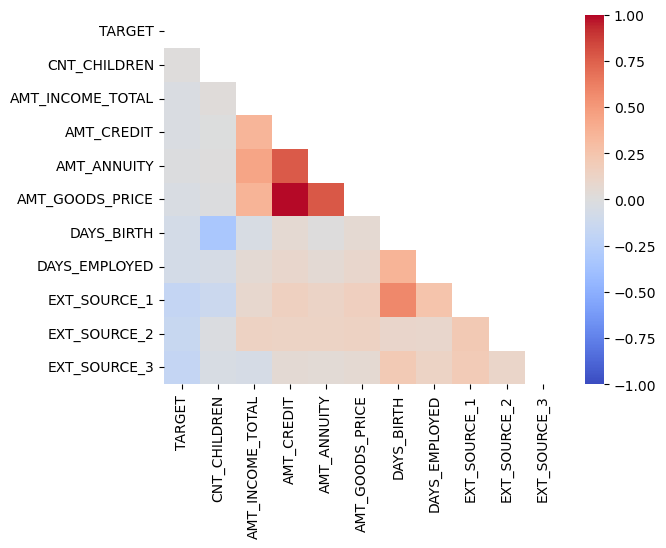

In [20]:
import numpy as np
import seaborn as sns

corr = df.select_dtypes(include=np.number).corr()
mask = np.triu(corr)
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", fmt=".2f", mask=mask)

In [21]:
# on construit la matrice X des Features
X = df.drop(columns='TARGET')
X

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,ORGANIZATION_TYPE,OCCUPATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
176999,Cash loans,2,1,0,0,117000.0,1350000.0,37255.5,1350000.0,"Spouse, partner",...,Higher education,Married,House / apartment,59.057534,NaN,NaN,NaN,NaN,0.297307,0.665855
213398,Cash loans,2,0,1,0,67500.0,342000.0,16762.5,342000.0,Unaccompanied,...,Secondary / secondary special,Married,House / apartment,49.065753,8.569863,Medicine,Medicine staff,NaN,0.549544,0.065993
169315,Cash loans,2,0,1,0,180000.0,254799.0,13950.0,193500.0,Unaccompanied,...,Secondary / secondary special,Married,House / apartment,58.493151,NaN,NaN,NaN,0.599112,0.592089,0.588488
228899,Cash loans,2,1,1,0,517500.0,834048.0,27693.0,720000.0,Unaccompanied,...,Higher education,Married,House / apartment,52.347945,1.679452,Bank,Managers,NaN,0.618755,0.670652
140700,Cash loans,2,0,1,0,108000.0,450000.0,17095.5,450000.0,Unaccompanied,...,Secondary / secondary special,Single / not married,House / apartment,45.569863,11.600000,Self-employed,Sales staff,NaN,0.780557,0.740799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66070,Cash loans,2,0,1,0,157500.0,772686.0,25056.0,553500.0,Unaccompanied,...,Secondary / secondary special,Widow,House / apartment,47.410959,NaN,NaN,NaN,NaN,0.668224,0.537070
76890,Cash loans,1,1,1,0,225000.0,243000.0,28836.0,243000.0,Unaccompanied,...,Secondary / secondary special,Married,House / apartment,44.802740,7.515068,Business Entity Type 3,Managers,NaN,0.605861,0.320163
196236,Cash loans,2,1,1,1,247500.0,269550.0,21739.5,225000.0,Unaccompanied,...,Higher education,Civil marriage,House / apartment,42.027397,2.764384,Self-employed,Sales staff,NaN,0.793654,0.454321
12168,Cash loans,1,1,1,0,180000.0,545040.0,26640.0,450000.0,Unaccompanied,...,Secondary / secondary special,Married,House / apartment,32.008219,8.531507,Industry: type 5,NaN,0.077362,0.672963,0.130129


In [22]:
# On construit l vecteur y des Targets
y = df['TARGET']
y

176999    0
213398    1
169315    0
228899    0
140700    0
         ..
66070     0
76890     0
196236    0
12168     0
25261     0
Name: TARGET, Length: 15376, dtype: int64

In [23]:
y.values

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
def resultize(grid, verbose=2):
    """make results based on gridsearchcv"""
    
    #make df
    results = pd.DataFrame(grid.cv_results_)
    
    #clean columns
    cols = [i for i in results.columns if not i.startswith("split")]
    results = results.loc[:, cols]
    
    if verbose==2:
        print("coucou")
        
    return results.round(2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## Refactoring avec utilisation de Pipeline 

### Création du ColumnTransformer

In [26]:
numerical_features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
                'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                'EXT_SOURCE_1', 'EXT_SOURCE_2',  'EXT_SOURCE_3']

categorical_features = ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                        'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

In [27]:
# Création de 2 Pipelines

numerical_pipeline = make_pipeline(KNNImputer(),
                                   StandardScaler())

categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
                                     OneHotEncoder())

In [28]:
# Création du ColumnTransformer
# numerical_pipeline est appliquée sur les numerical_features
# categorical_pipeline est appliquée sur les categorical_features

ColumnTransformer = make_column_transformer((numerical_pipeline, numerical_features),
                                            (categorical_pipeline, categorical_features))
ColumnTransformer

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('knnimputer', KNNImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['CODE_GENDER', 'FLAG_OWN_CAR',
                                  'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                                  'AMT_INCOME_TOTAL', 'AMT_CREDIT',
                                  'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                                  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1',
                                  'EXT_SOURCE_2', 'EXT_SOURCE_3']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['NAME_CONTRACT_TYPE', 'NAME_TYPE_SUITE',
                                  'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                                  'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
                                  'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'])])

In [29]:
pipe = Pipeline([("columntransformer", ColumnTransformer),
                 ("inputter", KNNImputer()),
                 ("scaler", StandardScaler()),
                 ("estimator", DummyRegressor()),
                ])

In [30]:
grid2 = GridSearchCV(pipe, param_grid={}, cv=5, verbose=2, return_train_score=True, n_jobs=-1)
grid2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('knnimputer',
                                                                                          KNNImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['CODE_GENDER',
                                                                          'FLAG_OWN_CAR',
                                                                          'FLAG_OWN_REALTY',
                                                                          'CNT_CHILDREN',
                                                                          'AMT_INCOME_TOTAL',
                                                                          'AMT_CREDIT',
                                                                          'AMT_ANNUITY',
                                                                          'AMT_GOODS_PRICE',
                                                                          'DAYS_BIRTH',
                                                                          'DAYS_EMPLOYED',
                                                                          '...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder())]),
                                                                         ['NAME_CONTRACT_TYPE',
                                                                          'NAME_TYPE_SUITE',
                                                                          'NAME_INCOME_TYPE',
                                                                          'NAME_EDUCATION_TYPE',
                                                                          'NAME_FAMILY_STATUS',
                                                                          'NAME_HOUSING_TYPE',
                                                                          'OCCUPATION_TYPE',
                                                                          'ORGANIZATION_TYPE'])])),
                                       ('inputter', KNNImputer()),
                                       ('scaler', StandardScaler()),
                                       ('estimator', DummyRegressor())]),
             n_jobs=-1, param_grid={}, return_train_score=True, verbose=2)

In [31]:
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\rudyg\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\utils\_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\base.py", line 918, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\impute\_knn.py", line 226, in fit
    X = self._validate_data(
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\base.py", line 604, in _validate_data
    out = check_array(X, input_name="X", **check_params)
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 883, in check_array
    array = _ensure_sparse_format(
  File "C:\Users\rudyg\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 534, in _ensure_sparse_format
    raise TypeError(
TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.


In [ ]:
resultize(grid2)